In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_validate

In [3]:
from sklearn.metrics import classification_report, roc_auc_score

In [4]:
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

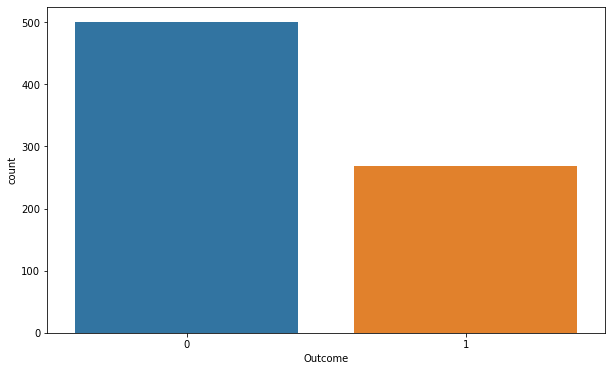

In [10]:
sns.countplot(df.Outcome)

<AxesSubplot:xlabel='Pregnancies'>

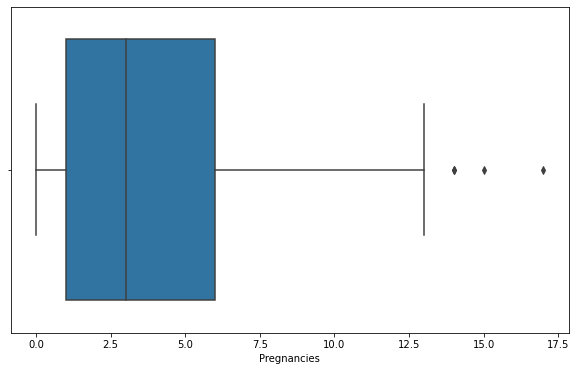

In [11]:
sns.boxplot(df.Pregnancies)

<AxesSubplot:xlabel='SkinThickness'>

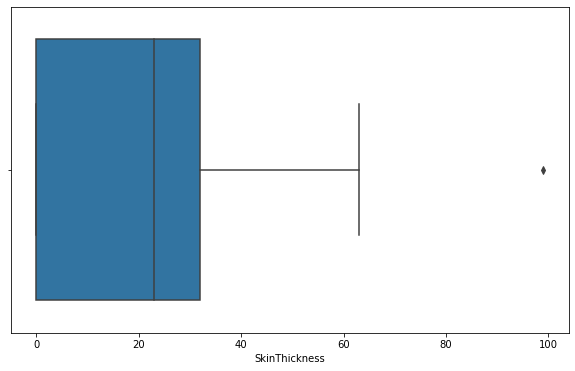

In [12]:
sns.boxplot(df.SkinThickness)

In [13]:
df=df[df.SkinThickness<70]

<AxesSubplot:xlabel='Glucose'>

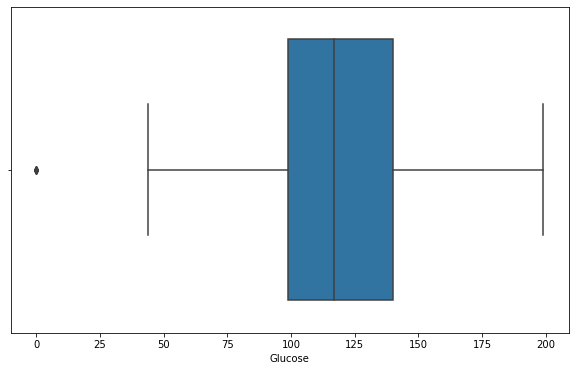

In [14]:
sns.boxplot(df.Glucose)

In [15]:
df=df[df.Glucose>0]

<AxesSubplot:xlabel='Glucose'>

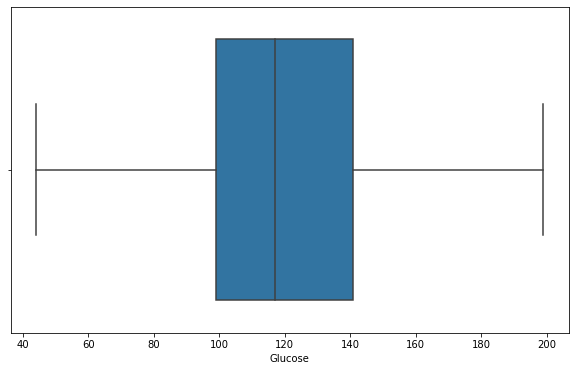

In [16]:
sns.boxplot(df.Glucose)

<AxesSubplot:xlabel='BloodPressure'>

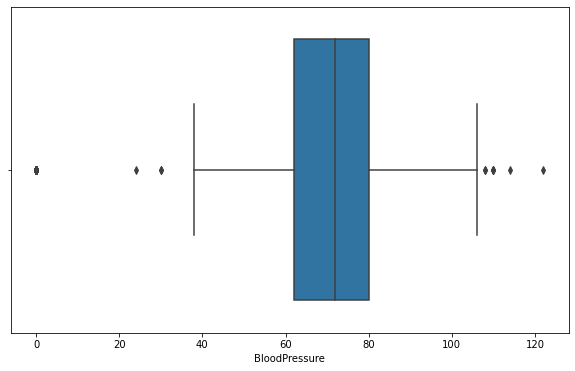

In [17]:
sns.boxplot(df.BloodPressure)

In [18]:
df=df[df.BloodPressure>35]

<AxesSubplot:xlabel='BMI'>

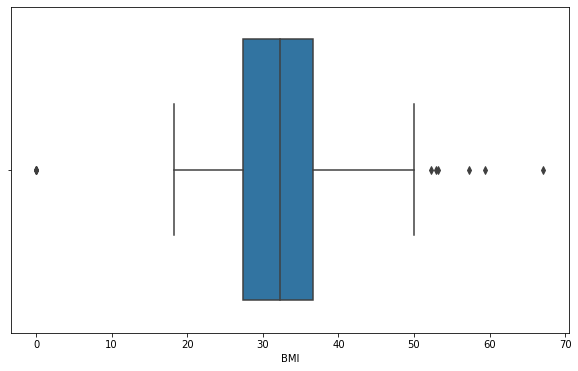

In [19]:
sns.boxplot(df.BMI)

In [20]:
df=df[df.BMI>0]

In [21]:
df=df[df.Pregnancies<13]

In [22]:
df.shape

(707, 9)

<AxesSubplot:>

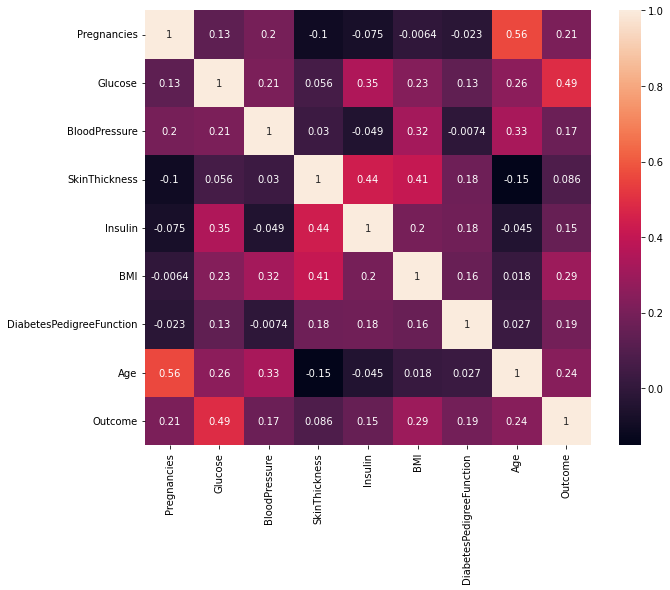

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

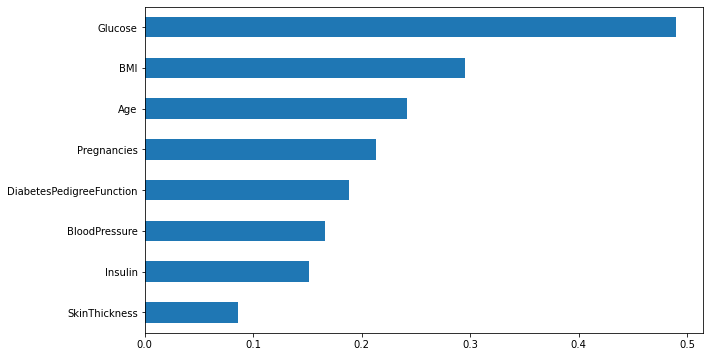

In [24]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

In [25]:
# en alakalı 3'ü görebilirim mesela .

In [26]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101) # stratify ****

In [29]:
scaler = StandardScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled

array([[-0.56399025, -0.54889378, -1.22125103, ...,  0.35695039,
        -0.74504243, -0.70404314],
       [ 1.33276267, -0.07074857,  0.43284661, ..., -1.09269892,
        -0.197052  ,  2.59111203],
       [ 0.38438621,  1.14055265, -0.22879244, ..., -0.38983865,
        -0.79865019,  2.50662087],
       ...,
       [-0.56399025,  0.18426222, -0.72502174, ...,  1.10373943,
         1.86386852, -0.7885343 ],
       [-0.56399025, -1.027039  ,  0.59825638, ..., -1.18055646,
        -0.67356542, -0.7885343 ],
       [ 2.59726461,  0.91741821, -0.22879244, ...,  1.36731203,
         0.79469154,  0.39434192]])

In [32]:
X_train_genel_bakis = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_genel_bakis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.56,-0.55,-1.22,1.20,0.07,0.36,-0.75,-0.70
1,1.33,-0.07,0.43,-1.38,-0.71,-1.09,-0.20,2.59
2,0.38,1.14,-0.23,-1.38,-0.71,-0.39,-0.80,2.51
3,-0.88,0.25,-1.06,0.10,0.70,-0.57,0.65,-1.04
4,-1.20,-0.52,-0.23,1.00,0.52,1.02,0.39,-0.96
...,...,...,...,...,...,...,...,...
560,0.07,-0.23,-0.06,-1.38,-0.71,-0.52,-0.30,1.07
561,-0.56,-1.25,-0.56,0.10,-0.30,-0.04,0.07,-0.96
562,-0.56,0.18,-0.73,1.33,-0.71,1.10,1.86,-0.79
563,-0.56,-1.03,0.60,-0.48,-0.26,-1.18,-0.67,-0.79


In [33]:
X_test_scaled.shape

(142, 8)

In [34]:
X_train_scaled.shape

(565, 8)

In [35]:
y_train.shape

(565,)

In [36]:
y_test.shape

(142,)

# Modeling & Prediction

In [37]:
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier()

In [38]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [39]:
random_user = pd.DataFrame(X_test_scaled).sample(1, random_state=45)
random_user

,0,1,2,3,4,5,6,7
0,-0.56,-1.03,-0.23,-0.29,-0.71,-0.76,-1.16,-0.96


In [40]:
knn_model.predict(random_user)

array([0], dtype=int64)

In [41]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

## auc ve roc'u hesaplayabilmek için bize ne lazım ?  predict_proba

In [42]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
y_pred_proba

array([[1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6,

In [43]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.00,0.00
1,0.60,0.40
2,0.80,0.20
3,0.80,0.20
4,1.00,0.00
...,...,...
137,0.60,0.40
138,0.20,0.80
139,0.60,0.40
140,0.60,0.40


In [44]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict)

,Actual,Pred,Proba_1,Proba_0
149,0,0,0.00,1.00
189,1,0,0.40,0.60
413,0,0,0.20,0.80
224,0,0,0.20,0.80
241,0,0,0.00,1.00
...,...,...,...,...
355,1,0,0.40,0.60
469,0,1,0.80,0.20
479,0,0,0.40,0.60
493,1,0,0.40,0.60


### Model Performance 

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

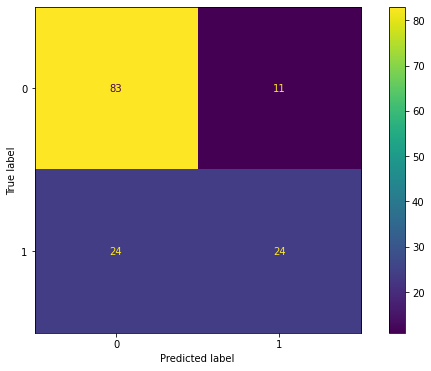

In [46]:
plot_confusion_matrix(knn_model,X_test_scaled, y_test);

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.50      0.58        48

    accuracy                           0.75       142
   macro avg       0.73      0.69      0.70       142
weighted avg       0.75      0.75      0.74       142



In [48]:
# AUC
roc_auc_score(y_test, y_pred_proba[:,1])

0.7934397163120568

### burada elde ettiğimiz skorlar nasıl artırılabilir ? 
                    # 1. Örnek boyutu arttıralabilir.(veri)
                    # 2. Veri ön işleme detaylandırılabilir.
                    # 3. feature engineering
                    # 4. İlgili algoritma için optimizasyonlar yapılabilir.

In [49]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Best K :

In [50]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [51]:
knn = KNeighborsClassifier()        # ----> boş model tanımladığımıza dikkat. çünkü biz aşağıda öğreteceğiz burada.

In [52]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [53]:
param_grid = {"n_neighbors": range(2, 50)}                 # n_neighbors böyle yazılmalı.

In [54]:
knn_gs_best = GridSearchCV(knn,
                           param_grid,
                           cv=5,
                           n_jobs=-1,        # ---------> -1 yapınca işlemleri tam performans kullanılır.daha hızlı sonuca gider
                           verbose=1)       

In [55]:
knn_gs_best.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 50)}, verbose=1)

In [56]:
knn_gs_best.best_params_        # burayla işim bitti artık

{'n_neighbors': 23}

In [57]:
knn

KNeighborsClassifier()

In [58]:
knn.set_params(**knn_gs_best.best_params_)

KNeighborsClassifier(n_neighbors=23)

In [59]:
knn

KNeighborsClassifier(n_neighbors=23)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [61]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [62]:
confusion_matrix(y_test,y_pred)

array([[85,  9],
       [26, 22]], dtype=int64)

In [63]:
from sklearn.metrics import plot_confusion_matrix

   # hata ?

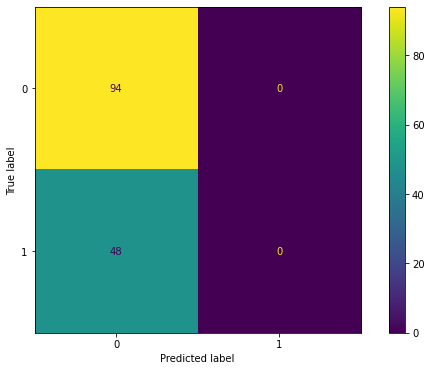

In [64]:
plot_confusion_matrix(knn, X_test_scaled, y_test);        

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        94
           1       0.71      0.46      0.56        48

    accuracy                           0.75       142
   macro avg       0.74      0.68      0.69       142
weighted avg       0.75      0.75      0.74       142



## Gridsearch scoring =  recall

In [66]:
knn_rec = KNeighborsClassifier()        # ----> boş model tanımladığımıza dikkat. çünkü biz aşağıda öğreteceğiz burada.

In [67]:
knn_rec.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [68]:
param_grid = {"n_neighbors": range(2, 50)}                 # n_neighbors böyle yazılmalı.

In [69]:
knn_gs_recall = GridSearchCV(knn_rec,
                           param_grid,
                           cv=5,
                           n_jobs=-1,        # ---------> -1 yapınca işlemleri tam performans kullanılır.daha hızlı sonuca gider
                           verbose=1,
                          scoring="recall")       

In [70]:
knn_gs_recall.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 50)}, scoring='recall',
             verbose=1)

In [71]:
knn_gs_recall.best_params_             # recall'ı dikkate alırsan 7 yap diyor mesela.

{'n_neighbors': 7}

In [72]:
knn.set_params(**knn_gs_recall.best_params_)

KNeighborsClassifier(n_neighbors=7)

In [73]:
knn_rec.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred = knn_rec.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        94
           1       0.65      0.50      0.56        48

    accuracy                           0.74       142
   macro avg       0.71      0.68      0.69       142
weighted avg       0.73      0.74      0.73       142

